In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_data)
df_clinical  = pd.read_csv(clinical_data)

# Combine the data into a single dataset

merged_file = pd.merge(df_clinical, df_mouse, how = 'left', on = "Mouse ID" )
# Display the data table for preview

merged_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = merged_file.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
df_tumor_mean = pd.DataFrame(tumor_volume_mean).reset_index()

# Preview DataFrame
df_tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_se = merged_file.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
df_tumor_volume_se = pd.DataFrame(tumor_volume_se).reset_index()
# Preview DataFrame
df_tumor_volume_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
#Reformated Mean---->Tumor Response
# Minor Data Munging to Re-Format the Data Frames 
reformat_mean = df_tumor_mean.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#Reformated Standard-Error--->Tumor Response
# Minor Data Munging to Re-Format the Data Frames 
reformat_se = df_tumor_volume_se.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
reformat_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


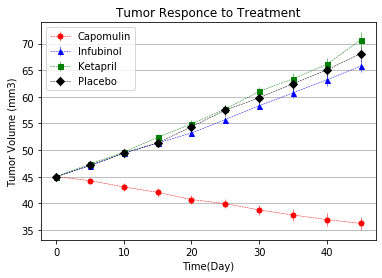

In [6]:
# Generate the Plot (with Error Bars)----> Did this at first but then found a better way

plt.errorbar(reformat_mean.index,reformat_mean['Capomulin'],yerr=reformat_se['Capomulin'],
             linewidth=0.5,markersize=5, color='red', marker='o', linestyle='--')
plt.errorbar(reformat_mean.index,reformat_mean['Infubinol'],yerr=reformat_se['Infubinol'],
             linewidth=0.5, markersize=5, color='blue', marker='^', linestyle='--')
plt.errorbar(reformat_mean.index,reformat_mean['Ketapril'],yerr=reformat_se['Ketapril'],
             linewidth=0.5, markersize=5, color='green', marker='s', linestyle='--')
plt.errorbar(reformat_mean.index,reformat_mean['Placebo'],yerr=reformat_se['Placebo'],
            linewidth=0.5, markersize=5, color='black', marker='D', linestyle='--')
    
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc = "best")
plt.xlabel('Time(Day)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Responce to Treatment')
plt.grid(axis = 'y')

# Save the Figure
plt.savefig("../Pymaceuticals/Tumor_response.png")

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = merged_file.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
df_metastatic_mean = pd.DataFrame(metastatic_mean).reset_index()

# Preview DataFrame
df_metastatic_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se = merged_file.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
df_metastatic_se = pd.DataFrame(metastatic_se).reset_index()

# Preview DataFrame
df_metastatic_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Reformated Mean-----> Metastatic 
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic_mean = df_metastatic_mean.pivot_table(index = "Timepoint", columns = "Drug", values  = 'Metastatic Sites')

# Preview that Reformatting worked
reformat_metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Reformated Standard-Error-----> Metastatic 
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic_se = df_metastatic_se.pivot_table(index = "Timepoint", columns = "Drug", values  = 'Metastatic Sites')

# Preview that Reformatting worked
reformat_metastatic_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


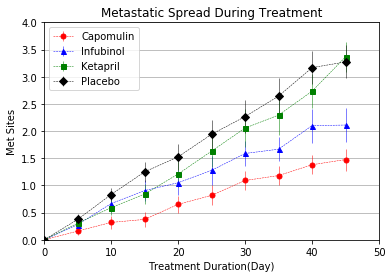

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_metastatic_mean.index,reformat_metastatic_mean['Capomulin'],yerr=reformat_metastatic_se['Capomulin'],
             linewidth=0.5,markersize=5, color='red', marker='o', linestyle='--')
plt.errorbar(reformat_metastatic_mean.index,reformat_metastatic_mean['Infubinol'],yerr=reformat_metastatic_se['Infubinol'],
             linewidth=0.5, markersize=5, color='blue', marker='^', linestyle='--')
plt.errorbar(reformat_metastatic_mean.index,reformat_metastatic_mean['Ketapril'],yerr=reformat_metastatic_se['Ketapril'],
             linewidth=0.5, markersize=5, color='green', marker='s', linestyle='--')
plt.errorbar(reformat_metastatic_mean.index,reformat_metastatic_mean['Placebo'],yerr=reformat_metastatic_se['Placebo'],
            linewidth=0.5, markersize=5, color='black', marker='D', linestyle='--')

# Graph Title, x and y axis labels and limits
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc = "best")
plt.xlabel('Treatment Duration(Day)')
plt.ylabel('Met Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(axis = 'y')
plt.xlim(0,50)
plt.ylim(0,4)

# Save the Figure
plt.savefig("../Pymaceuticals/Metastaic_response.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = merged_file.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
df_survival_rate = pd.DataFrame(survival_rate).reset_index()
df_survival_rate.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformated_survival_rate = df_survival_rate.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
# Preview the Data Frame
reformated_survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


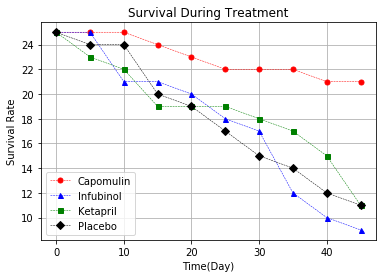

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(reformated_survival_rate['Capomulin'], linewidth=0.5,markersize=5, color='red', marker='o', linestyle='--')
plt.plot(reformated_survival_rate['Infubinol'],linewidth=0.5, markersize=5, color='blue', marker='^', linestyle='--')
plt.plot(reformated_survival_rate['Ketapril'],linewidth=0.5, markersize=5, color='green', marker='s', linestyle='--')
plt.plot(reformated_survival_rate['Placebo'],linewidth=0.5, markersize=5, color='black', marker='D', linestyle='--')

# Graph Title, x and y axis labels and limits
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc = "lower left")
plt.xlabel('Time(Day)')
plt.ylabel('Survival Rate')
plt.title('Survival During Treatment')
plt.grid(axis = 'both')

# Save the Figure
plt.savefig("../Pymaceuticals/Survival_rate.png")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# # Calculate the percent changes for each drug
# tumor_change = (reformat_mean.iloc[-1]/(reformat_mean.iloc[0])-1)*100
# # Display the data to confirm
# tumor_change

tumor_change = (reformat_mean.loc[45, :] - reformat_mean.loc[0, :])/reformat_mean.loc[0, :] * 100
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

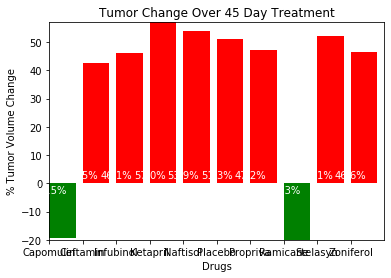

In [31]:
# Store all Relevant Percent Changes into a Tuple
tumor_change.index
drug = list(tumor_change.index)

colors = ['r' if tc > 0 else 'g' for tc in tumor_change]
colors

x_axis = np.arange(len(tumor_change))
x_axis
# Splice the data between passing and failing drugs





# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_axis, tumor_change, color = colors, align="edge")


# Tick Locations
tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, tumor_change.index)
plt.xticks(np.arange(len(xlabels)), xlabels)

# x and y limits
plt.xlim(0, len(x_axis))
plt.ylim(-20, max(tumor_change.values))

#Graph Labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
count = 0
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1


# Call functions to implement the function calls

# Save the Figure
plt.savefig("../Pymaceuticals/Tumor Volume Change.png")

# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
# Observation 1
# Capomulin was the most successful at treating the tumors in this population
# mice. The other three were not effeective as much. As we can see during this treatment, the tumor vomume shrunk.
# Ketapril was the least effective at treating the tumor volume

In [ ]:
# Observation 2
# When I looked at the survival graph, for the mice that were treated with Capomulin
# had the higher survivial rate.

In [ ]:
# Observation 3
# The placebo had very similar results to Infubinol and Ketapril in all areas analyzed.\
#and it was the deadliest drug with the lowest survival rate. Also, metatistic site stil spread during 
# the treatment, but it was the least while using Capomulin.